In [1]:
pip install -qU langgraph langchain-google-genai google-generativeai ipython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 619.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.4/621.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 1.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.43.0, but you have google-auth 2.45.0 which is incompatible.
google-

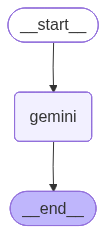


Final Output:

LangGraph is a framework for building robust, stateful LLM applications that orchestrate complex, multi-step workflows with dynamic control flow and cycles using a graph representation.


In [3]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Image, display
import os
from google.colab import userdata
# 1. Setup API Keys
os.environ["GOOGLE_API_KEY"] = userdata.get('GEMINI_API_KEY')
# ----------------------------------
# Gemini LLM
# ----------------------------------
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.3
)

# ----------------------------------
# LLM Node
# ----------------------------------
def gemini_node(state: MessagesState):
    response = llm.invoke(state["messages"])
    return {
        "messages": state["messages"] + [response]
    }

# ----------------------------------
# Build Graph
# ----------------------------------
graph = StateGraph(MessagesState)

graph.add_node("gemini", gemini_node)
graph.add_edge(START, "gemini")
graph.add_edge("gemini", END)

compiled_graph = graph.compile()

# ----------------------------------
# Visualize Graph
# ----------------------------------
display(Image(compiled_graph.get_graph().draw_mermaid_png()))

# ----------------------------------
# Invoke Graph
# ----------------------------------
result = compiled_graph.invoke({
    "messages": [
        {"role": "user", "content": "Explain LangGraph in one sentence"}
    ]
})

print("\nFinal Output:\n")
print(result["messages"][-1].content)
